# Data Mining Assignment 2_DT_NB

## Student Details

Student Name and ID of the member submitting the assignment: Dumpa Bharat Kumar , ID - 1001870815

Student Name and ID of the remaining members: Likhita Muddana, ID – 1001949141

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (5 Points)


For this assignment use Jupyter notebook, Panda, and scikit.

1) Load Gender_Classifier.csv .Output/prediction variable is 'gender' [1 points]

2) Create a dataframe and print the first and last seven records of your dataset.  [1 points]

3) Print the class labels. [1 points]

4) Split your dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022 [2 points]

### DecisionTree (10 Points)
1) Use gini and entropy to measure the quality of a split. [2 points]

2) Use comments to explain your code and variable names. [1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support. Explain the confusion matrix and classification report in your own words). Do not copy from the internet.[4 points]

4) Print the decision tree visualization for 3 different depths using given libraries.  [3 points]

# Naive Bayes (10 Points)

1) Use all types of Naive bayes classifier present in the sklearn to predict the test data. If you are not able to implement any of the classifier explain in detail why it can't be done.[5 point] 

2) Use comments to explain your code and variable names[1 point]

3) Calculate and print the confusion matrix (use graphics instead showing a 2D array), and the classification Report (includes: precision, recall, f1-score, and support)for all the NB Classifier. show the best classifier. Explain the classification report in your own words. Do not copy from the internet. [4 points]

## Report (23 Points)


1) Describe the Decision Tree methods, and Naive Bayes classifier in details in your own words. Dont copy paste it from the internet. Write it on your own.  [5 points]

2) Describe the datasets like what do you understand from the dataset? and if you have done any pre-processing , and your code, please write down your observation. [6 points]

4) Visualization of the decision tree for gini and entropy.[4 points]

5) Interpret your results, compare gini and entropy [4 points]

6) Visualize the dataset, for the target variable - 2 graphs [4 points]

Do not to forget to cite your sources!

In [952]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
#import scikitplot as skplt
from matplotlib import rcParams
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
#Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [953]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('Gender_classifier.csv', encoding='latin1')

In [989]:
#new Data Frame wwith top 7 and last 7 records.
new_data = pd.DataFrame(data=df_data.head(7).append(df_data.tail(7))) 
new_data

/var/folders/z4/fkls1k917_51fhgf9jbrkgd40000gn/T/ipykernel_6466/3485845350.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = pd.DataFrame(data=df_data.head(7).append(df_data.tail(7)))


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,0,finalized,3,10/26/15 23:24,1,1.0000,1,1.0,12/5/13 01:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.590000e+17,main; @Kan1shk3,others
1,815719227,0,finalized,3,10/26/15 23:30,1,1.0000,1,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.590000e+17,London,Eastern Time (US & Canada)
2,815719228,0,finalized,3,10/26/15 23:33,1,0.6625,1,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.590000e+17,clcncl,others
3,815719229,0,finalized,3,10/26/15 23:10,1,1.0000,1,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,0,finalized,3,10/27/15 01:15,0,1.0000,1,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.590000e+17,London,Eastern Time (US & Canada)
5,815719231,0,finalized,3,10/27/15 01:47,0,1.0000,1,1.0,3/11/10 18:14,...,https://pbs.twimg.com/profile_images/656336865...,0,0,"Ive seen people on the train with lamps, chair...",NaN,20036,10/26/15 12:40,6.590000e+17,New York Gritty,Central Time (US & Canada)
7,815719233,0,finalized,3,10/26/15 23:48,1,1.0000,1,1.0,12/3/12 21:54,...,https://pbs.twimg.com/profile_images/508875440...,0,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,NaN,112117,10/26/15 12:40,6.590000e+17,London,Eastern Time (US & Canada)
20043,815756700,1,golden,240,NaN,1,1.0000,1,1.0,9/27/11 00:19,...,https://pbs.twimg.com/profile_images/378800000...,1,5ED4DC,"Game faggot and venison loin, crisp spelt and ...",NaN,8193,10/26/15 13:19,6.590000e+17,Chertsey Bridge,Eastern Time (US & Canada)
20044,815756767,1,golden,227,NaN,0,1.0000,1,1.0,6/11/14 01:55,...,https://pbs.twimg.com/profile_images/643483977...,0,C0DEED,Need A Ride Home From Practice _Ù÷Ô_Ù÷Ô_Ù÷ÔAnd...,NaN,6669,10/26/15 13:19,6.590000e+17,London,Eastern Time (US & Canada)
20045,815757572,1,golden,259,NaN,0,1.0000,1,1.0,8/5/15 21:16,...,https://pbs.twimg.com/profile_images/656793310...,0,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",NaN,783,10/26/15 13:20,6.590000e+17,Verona ªÁ,Eastern Time (US & Canada)


In [955]:
#Printing the class labels 
for col in df_data.columns:
    print(col)

_unit_id
_golden
_unit_state
_trusted_judgments
_last_judgment_at
gender
gender:confidence
profile_yn
profile_yn:confidence
created
description
fav_number
gender_gold
link_color
name
profile_yn_gold
profileimage
retweet_count
sidebar_color
text
tweet_coord
tweet_count
tweet_created
tweet_id
tweet_location
user_timezone


# Preprocessing

In [956]:
def cardinality_list(col,count):
    df = pd.DataFrame(df_data['user_timezone'].value_counts())
    return list(df[df['user_timezone'] > count].reset_index()['index'])

def date_to_days(col):
    df_data[col]=pd.to_datetime(df_data[col])
    df_data[col] = df_data[col].apply(lambda x:date.today() - x.date())
    

In [957]:
# Dropping rows other than male and female
df_data =  df_data.loc[(df_data.gender == "male") | (df_data.gender == "female")]

In [958]:
# Columns removed Unit_id,tweet_id,description,text,name,profile_image
num=['_trusted_judgments','df_data:confidence','profile_yn:confidence','fav_number','retweet_count','tweet_count']
cat=['_unit_state','gender','gender_gold','link_color','profile_yn_gold','sidebar_color','tweet_coord','tweet_location','user_timezone']
date=['tweet_created','created','_last_judgment_at']
boolean =['_golden','profile_yn']

In [959]:
# Imputing values of tweet_location,user_timezone and df_data:confidence
df_data['tweet_location'] = df_data['tweet_location'].fillna('London')
df_data['user_timezone'] = df_data['user_timezone'].fillna('Eastern Time (US & Canada)')
df_data['gender:confidence'] = df_data['gender:confidence'].fillna(1.0)

#Changing Boolean values to 0 and 1
df_data['profile_yn'] = df_data['profile_yn'].replace({'yes':1,'no':0})
df_data['_golden'] = df_data['_golden'].astype(int)

# Encoding df_data 1 for male and 0 for female
df_data['gender'] = df_data['gender'].replace({'male':1,'female':0})

In [960]:
l=cardinality_list('user_timezone',100)
m = cardinality_list('link_color',100)
n = cardinality_list('sidebar_color',100)
# Reducing Cardinality in user_timezone
df_data['user_timezone'] = [x if x in l else 'others' for x in df_data['user_timezone']]

In [961]:
# Dropping gender_gold,profile_yn_gold,tweet_coord as the fillrate is less than 1%
# Dropping Dates and tweet_location
col_to_remove = ['tweet_coord','tweet_location','profile_yn_gold','gender_gold','gender']
cat_1 = [x for x in cat if x not in col_to_remove]

In [962]:
# One hot encoding
gender_1 = pd.get_dummies(df_data,columns = cat_1)

In [963]:
# Scaling Data
sc = StandardScaler()
gender_1['tweet_count'] = sc.fit_transform(gender_1[['tweet_count']])
gender_1['fav_number'] = sc.fit_transform(gender_1[['fav_number']])
gender_1['_trusted_judgments'] = sc.fit_transform(gender_1[['_trusted_judgments']])
gender_1 = gender_1.drop(['text','description','name','tweet_coord','tweet_location','profile_yn_gold','profileimage','gender_gold','gender','tweet_created','created','_last_judgment_at','_unit_id','tweet_id'],axis = 1)

In [964]:
#it is the dataset with all the columns except the prediction variable.
featured_data = gender_1

#it is the dataset of the prediction variable.
prediction_data = df_data['gender']

In [965]:
#Splitting dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022

# #spliting the dataset into 60% training dataset.
feature_training,feature_test,prediction_train,prediction_test=train_test_split(featured_data,prediction_data,train_size=0.6,random_state = 2022) 
#spliting the dataset into 20% testing and 20% validation dataset.
feature_valid, feature_test, prediction_valid, prediction_test = train_test_split(feature_test,prediction_test, test_size=0.5, random_state = 2022)



# Decision Tree


In [966]:
#Gini index
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
 # Creating the classifier object
dTClf = DecisionTreeClassifier (criterion="gini",max_depth=4)



In [967]:
# Gnb = GaussianNB()
# Gnb.fit(feature_training, prediction_train)

In [968]:
#classification fit in the training data
dTClf.fit(feature_training, prediction_train)

DecisionTreeClassifier(max_depth=4)

In [969]:
y_pred=dTClf.predict(feature_test)

In [970]:
# getting accuracy score from metrics accuracy_score
from sklearn.metrics import accuracy_score
score = accuracy_score(prediction_test, y_pred)
print("Accuracy for predicted test data set - " , score)

Accuracy for predicted test data set -  0.5886002326483133


In [971]:
from sklearn.metrics import classification_report
print("Report of predicted test Dataset : \n ",classification_report(prediction_test, y_pred))
print("Confusion Matrix of predicated test Dataset: \n",confusion_matrix(prediction_test, y_pred))


Report of predicted test Dataset : 
                precision    recall  f1-score   support

           0       0.61      0.57      0.59      1338
           1       0.57      0.61      0.59      1241

    accuracy                           0.59      2579
   macro avg       0.59      0.59      0.59      2579
weighted avg       0.59      0.59      0.59      2579

Confusion Matrix of predicated test Dataset: 
 [[764 574]
 [487 754]]


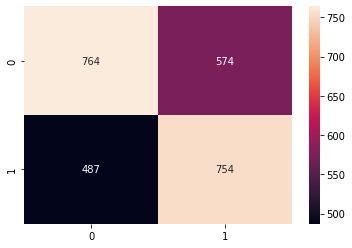

In [972]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(prediction_test,y_pred)
f = sns.heatmap(cm, annot= True, fmt='d')

In [973]:
# importing the classifier and fitting the training data.
clf = DecisionTreeClassifier(max_depth=8)
clf.fit(feature_training, prediction_train)

# predicing the data based on the validation data split
val_pred = clf.predict(feature_valid)

# predicing the data based in the testing data split
test_pred = clf.predict(feature_valid)

print("Validation Accuracy", clf.score(feature_valid, prediction_valid))
print("Test Accuracy", clf.score(feature_test, prediction_test))

Validation Accuracy 0.5897634742148119
Test Accuracy 0.5781310585498255


In [974]:
def printTree(depth):
    from sklearn import tree
    clf = DecisionTreeClassifier(max_depth = depth, criterion='gini')
    clf.fit(feature_training, prediction_train)
    clf.predict(feature_test)
    tree.plot_tree(clf)

In [975]:
def printTreeEntropy(depth):
    from sklearn import tree
    clf = DecisionTreeClassifier(max_depth = depth, criterion='entropy')
    clf.fit(feature_training, prediction_train)
    clf.predict(feature_test)
    tree.plot_tree(clf)

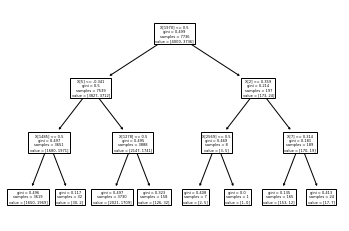

In [976]:
#printing the decision tree for depth 3 by Gini
printTree(3)

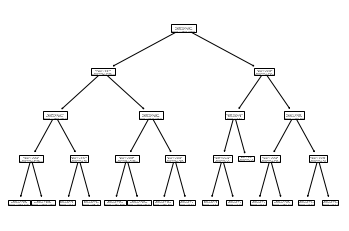

In [977]:
#printing the decision tree for depth 4 by Gini
printTree(4)

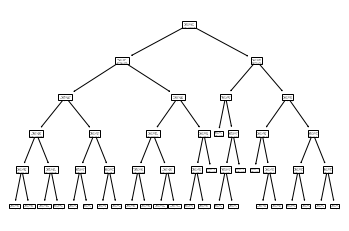

In [978]:
#printing the decision tree for depth 5 by Gini
printTree(5)

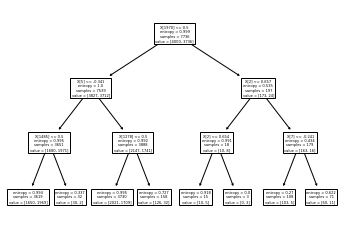

In [979]:
#printing the decision tree for depth 3 by Entropy
printTreeEntropy(3)

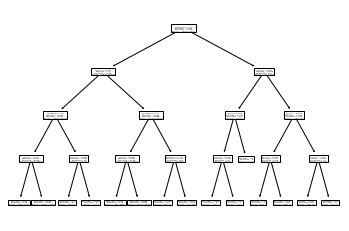

In [980]:
#printing the decision tree for depth 4 by Entropy
printTreeEntropy(4)

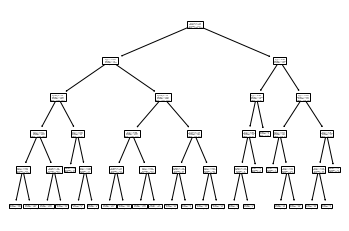

In [981]:
#printing the decision tree for depth 5 by Entropy
printTreeEntropy(5)

# Naive bayes



Gaussian Naive bayes

In [982]:
Gnb = GaussianNB()
Gnb.fit(feature_training, prediction_train)
y_pred = Gnb.predict(feature_test)
y_pred_val = Gnb.predict(feature_valid)

-------------------- Test Accuracy --------------------
Report for Test Datgaset: 
                precision    recall  f1-score   support

           0       0.77      0.02      0.04      1338
           1       0.48      0.99      0.65      1241

    accuracy                           0.49      2579
   macro avg       0.63      0.51      0.34      2579
weighted avg       0.63      0.49      0.33      2579

Confusion Matrix for Test Datgaset: 
 [[  24 1314]
 [   7 1234]]


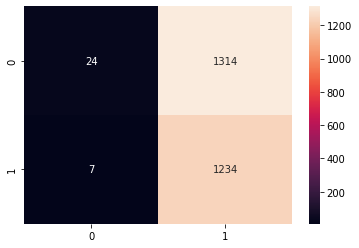

In [983]:
#getting classification report and confusion matrix for the Gaussian 
from sklearn.metrics import classification_report
print("-"*20, "Test Accuracy", "-"*20)
print("Report for Test Datgaset: \n ",classification_report(prediction_test, y_pred))
print("Confusion Matrix for Test Datgaset: \n",confusion_matrix(prediction_test, y_pred))
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(prediction_test,y_pred)
f = sns.heatmap(cm, annot= True, fmt='d')

-------------------- Validation Accuracy --------------------
Confusion Matrix: 

[[  18 1344]
 [   6 1211]]
Classification Report: 

              precision    recall  f1-score   support

           0       0.75      0.01      0.03      1362
           1       0.47      1.00      0.64      1217

    accuracy                           0.48      2579
   macro avg       0.61      0.50      0.33      2579
weighted avg       0.62      0.48      0.32      2579



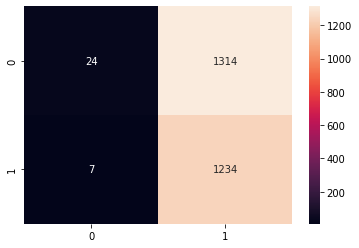

In [984]:

from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("-"*20, "Validation Accuracy", "-"*20)
print("Confusion Matrix: \n")
print(confusion_matrix(prediction_valid, y_pred_val))
print("Classification Report: \n")
print(classification_report(prediction_valid, y_pred_val))
cmv = confusion_matrix(prediction_test,y_pred)
f = sns.heatmap(cmv, annot= True, fmt='d')

Bernoulli Naive Bayes

In [985]:
Bnb = BernoulliNB()
Bnb.fit(feature_training, prediction_train)

BernoulliNB()

In [986]:
y_pred = Bnb.predict(feature_test)


y_pred_val = Bnb.predict(feature_valid)

-------------------- Test Accuracy --------------------
Report for Test Datgaset : 
                precision    recall  f1-score   support

           0       0.65      0.52      0.58      1338
           1       0.57      0.70      0.63      1241

    accuracy                           0.60      2579
   macro avg       0.61      0.61      0.60      2579
weighted avg       0.61      0.60      0.60      2579

Confusion Matrix for Test Datgaset: 
  [[691 647]
 [372 869]]


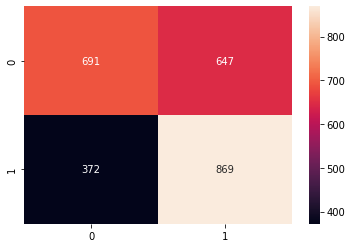

In [987]:
#getting classification report and confusion matrix for the Multinomial
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("-"*20, "Test Accuracy", "-"*20)
print("Report for Test Datgaset : \n ",classification_report(prediction_test, y_pred))
print("Confusion Matrix for Test Datgaset: \n ",confusion_matrix(prediction_test, y_pred))

cm = confusion_matrix(prediction_test,y_pred)
f = sns.heatmap(cm, annot= True, fmt='d')




-------------------- Validation Accuracy --------------------
Confusion Matrix: 

[[707 655]
 [402 815]]
Classification Report: 

              precision    recall  f1-score   support

           0       0.64      0.52      0.57      1362
           1       0.55      0.67      0.61      1217

    accuracy                           0.59      2579
   macro avg       0.60      0.59      0.59      2579
weighted avg       0.60      0.59      0.59      2579



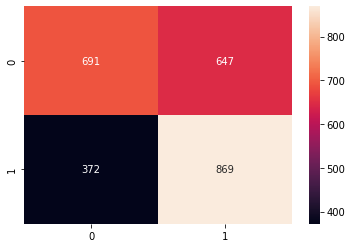

In [988]:

from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("-"*20, "Validation Accuracy", "-"*20)
print("Confusion Matrix: \n")
print(confusion_matrix(prediction_valid, y_pred_val))
print("Classification Report: \n")
print(classification_report(prediction_valid, y_pred_val))
cmv = confusion_matrix(prediction_test,y_pred)
f = sns.heatmap(cmv, annot= True, fmt='d')